In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

temperature_df = pd.read_csv(r'C:\Users\AGL\Downloads\historical-hourly-weather-data\temperature.csv')



In [3]:
print(temperature_df.head(5))


              datetime   Vancouver    Portland  San Francisco     Seattle  \
0  2012-10-01 12:00:00         NaN         NaN            NaN         NaN   
1  2012-10-01 13:00:00  284.630000  282.080000     289.480000  281.800000   
2  2012-10-01 14:00:00  284.629041  282.083252     289.474993  281.797217   
3  2012-10-01 15:00:00  284.626998  282.091866     289.460618  281.789833   
4  2012-10-01 16:00:00  284.624955  282.100481     289.446243  281.782449   

   Los Angeles   San Diego   Las Vegas     Phoenix  Albuquerque  ...  \
0          NaN         NaN         NaN         NaN          NaN  ...   
1   291.870000  291.530000  293.410000  296.600000   285.120000  ...   
2   291.868186  291.533501  293.403141  296.608509   285.154558  ...   
3   291.862844  291.543355  293.392177  296.631487   285.233952  ...   
4   291.857503  291.553209  293.381213  296.654466   285.313345  ...   

   Philadelphia    New York    Montreal      Boston   Beersheba  \
0           NaN         NaN         N

In [4]:
print(temperature_df.tail(5))


                  datetime  Vancouver  Portland  San Francisco  Seattle  \
45248  2017-11-29 20:00:00        NaN    282.00            NaN   280.82   
45249  2017-11-29 21:00:00        NaN    282.89            NaN   281.65   
45250  2017-11-29 22:00:00        NaN    283.39            NaN   282.75   
45251  2017-11-29 23:00:00        NaN    283.02            NaN   282.96   
45252  2017-11-30 00:00:00        NaN    282.28            NaN   283.04   

       Los Angeles  San Diego  Las Vegas  Phoenix  Albuquerque  ...  \
45248       293.55     292.15     289.54   294.71       285.72  ...   
45249       295.68     292.74     290.61   295.59       286.45  ...   
45250       295.96     292.58     291.34   296.25       286.44  ...   
45251       295.65     292.61     292.15   297.15       286.14  ...   
45252       294.93     291.40     291.64   297.15       284.70  ...   

       Philadelphia  New York  Montreal  Boston  Beersheba  Tel Aviv District  \
45248        290.24       NaN    275.13  

In [5]:
temperature_df.columns

Index(['datetime', 'Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City',
       'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis',
       'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami',
       'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal',
       'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa',
       'Nahariyya', 'Jerusalem'],
      dtype='object')

In [ ]:
# This tells us a few things:

# The extent of this data set begins on October 1st, 2012 and ends on on November 29th, 2017.
# Not all cities have sufficient data which begins and ends on these dates.
# Data has been taken at 1-hour intervals, 24 times per day.
# Temperatures are in Kelvin: the world's most useless unit of measurement

In [ ]:
# Remove Extraneous Data
# 24 readings per day is a lot. Creating charts can take a significant amount of system resources (and time), which makes 24 separate temperatures every day ludicrous. Let's save ourselves 23/24ths of this headache by taking our recorded temperatures down to one reading per day.

# We'll modify our DataFrame to only include one out of every 24 rows:

In [12]:
modified_df = temperature_df.iloc[::24]
modified_df.shape

(1886, 37)

In [16]:
temperature_df.isnull().sum()

datetime               0
Vancouver            795
Portland               1
San Francisco        793
Seattle                3
Los Angeles            3
San Diego              1
Las Vegas              1
Phoenix                3
Albuquerque            1
Denver                 1
San Antonio            1
Dallas                 4
Houston                3
Kansas City            1
Minneapolis           13
Saint Louis            1
Chicago                3
Nashville              2
Indianapolis           7
Atlanta                6
Detroit                1
Jacksonville           1
Charlotte              3
Miami                805
Pittsburgh             3
Toronto                1
Philadelphia           3
New York             793
Montreal               3
Boston                 3
Beersheba            798
Tel Aviv District    793
Eilat                792
Haifa                798
Nahariyya            797
Jerusalem            793
dtype: int64

In [17]:
temperature_df.isna().sum()

datetime               0
Vancouver            795
Portland               1
San Francisco        793
Seattle                3
Los Angeles            3
San Diego              1
Las Vegas              1
Phoenix                3
Albuquerque            1
Denver                 1
San Antonio            1
Dallas                 4
Houston                3
Kansas City            1
Minneapolis           13
Saint Louis            1
Chicago                3
Nashville              2
Indianapolis           7
Atlanta                6
Detroit                1
Jacksonville           1
Charlotte              3
Miami                805
Pittsburgh             3
Toronto                1
Philadelphia           3
New York             793
Montreal               3
Boston                 3
Beersheba            798
Tel Aviv District    793
Eilat                792
Haifa                798
Nahariyya            797
Jerusalem            793
dtype: int64

In [18]:
temperature_df = pd.read_csv(r'C:\Users\AGL\Downloads\historical-hourly-weather-data\temperature.csv')
nyc_df = temperature_df[['datetime','New York']]
nyc_df = nyc_df.iloc[::24]
nyc_df.dropna(how='any', inplace=True)

print(nyc_df.head(5))
print(nyc_df.tail(5))

                datetime    New York
24   2012-10-02 12:00:00  289.991473
48   2012-10-03 12:00:00  290.370000
72   2012-10-04 12:00:00  290.840000
96   2012-10-05 12:00:00  293.180000
120  2012-10-06 12:00:00  288.240000
                  datetime  New York
44352  2017-10-23 12:00:00    289.07
44376  2017-10-24 12:00:00    294.23
44400  2017-10-25 12:00:00    286.15
44424  2017-10-26 12:00:00    284.31
44448  2017-10-27 12:00:00    278.44


In [19]:
nyc_df.isna().sum()

datetime    0
New York    0
dtype: int64

In [ ]:
# Fixing Our Temperatures
# We've got to do something about this Kelvin situation. The last time I measured anything in degrees Kelvin was while monitoring my reactor heat in Mech Warrior 2. Don't try and find that game, it's a relic from the 90's.

# formula for converting Kelvin to Fahrenheit:
# formula (x − 273.15) × 9/5 + 32

In [45]:
# formula (x − 273.15) × 9/5 + 32
# nyc_df["new data"]=nyc_df["new data"].apply(lambda x: (x-273.15) * 9/5 + 32)
# nyc_df

In [21]:
nyc_df["temperature"]=nyc_df["New York"].apply(lambda x: (x-273.15) * 9/5 + 32)

In [22]:
nyc_df

,datetime,New York,temperature
24,2012-10-02 12:00:00,289.991473,62.314651
48,2012-10-03 12:00:00,290.370000,62.996000
72,2012-10-04 12:00:00,290.840000,63.842000
96,2012-10-05 12:00:00,293.180000,68.054000
120,2012-10-06 12:00:00,288.240000,59.162000
144,2012-10-07 12:00:00,289.640000,61.682000
168,2012-10-08 12:00:00,282.870000,49.496000
192,2012-10-09 12:00:00,280.400000,45.050000
216,2012-10-10 12:00:00,283.900000,51.350000
240,2012-10-11 12:00:00,285.540000,54.302000


In [23]:
nyc_df.columns
# temperature_df = pd.read_csv(r'C:\Users\AGL\Downloads\historical-hourly-weather-data\temperature.csv')


Index(['datetime', 'New York', 'temperature'], dtype='object')

In [24]:

# nyc_df["temperature"]=nyc_df["temperature"].apply(lambda x: (x-273.15) * 9/5 + 32)
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852 entries, 24 to 44448
Data columns (total 3 columns):
datetime       1852 non-null object
New York       1852 non-null float64
temperature    1852 non-null float64
dtypes: float64(2), object(1)
memory usage: 57.9+ KB


In [25]:
nyc_df['date'] = pd.to_datetime(nyc_df['datetime'])

In [28]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852 entries, 24 to 44448
Data columns (total 4 columns):
datetime       1852 non-null object
New York       1852 non-null float64
temperature    1852 non-null float64
date           1852 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 72.3+ KB


In [29]:
nyc_df['year'] = nyc_df['date'].dt.year

In [30]:
nyc_df['day'] = nyc_df['date'].dt.dayofyear

In [68]:
# nyc_df['year'] = nyc_df['datetime'].dt.year
#"Object" is a fancy Pandas word for "uselessly broad classification of data type." Pandas sees the special characters in this column's data, thus immediately surrenders any attempt to logically parse said data. Let's fix this:


In [31]:
nyc_df.head()

,datetime,New York,temperature,date,year,day
24,2012-10-02 12:00:00,289.991473,62.314651,2012-10-02 12:00:00,2012,276
48,2012-10-03 12:00:00,290.370000,62.996000,2012-10-03 12:00:00,2012,277
72,2012-10-04 12:00:00,290.840000,63.842000,2012-10-04 12:00:00,2012,278
96,2012-10-05 12:00:00,293.180000,68.054000,2012-10-05 12:00:00,2012,279
120,2012-10-06 12:00:00,288.240000,59.162000,2012-10-06 12:00:00,2012,280


In [69]:
# nyc_df['day'] = nyc_df['date'].dt.dayofyear

In [32]:
nyc_df.columns

Index(['datetime', 'New York', 'temperature', 'date', 'year', 'day'], dtype='object')

In [33]:
nyc_df.columns=['date','temperature']

ValueError: Length mismatch: Expected axis has 6 elements, new values have 2 elements

In [102]:
# nyc_df.reset_index(inplace=True)

In [35]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [36]:
%matplotlib inline
plt.figure(figsize=(80, 50))
plt.show()

<Figure size 5760x3600 with 0 Axes>

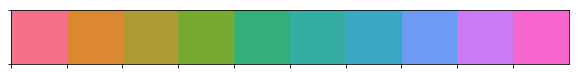

In [37]:
sns.palplot(sns.color_palette("husl", 10))
plt.show()

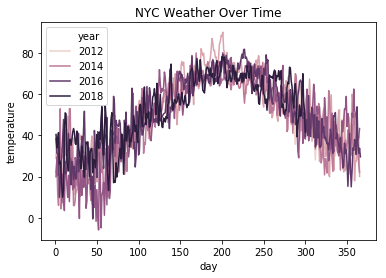

In [40]:

plt.title('NYC Weather Over Time')
# plt.figure(figsize=(19, 10))
nyc_chart = sns.lineplot(x="day",
                         y="temperature",
                         hue='year',
                         data=nyc_df
                         ).set_title('NYC Weather Over Time')
plt.show()